# 타이타닉 데이터셋 분석하고 예측하기

### 2022100870 손수민

## Titanic 데이터셋

#### 데이터 다운로드
  https://www.kaggle.com/c/titanic (Titanic: Machine Learning from Disaster)
#### 데이터 column
- survival: 생존여부( 생존:1, 생존x: 0)
- pclass: 티켓 등급(1등급:1. 2등급: 2, 3등급: 3)
- sex: 성별(male,female)
- age: 나이(float)
- sibsp: 타이타닉에 승선한 형제자매 또는 배우자의 수
- parch: 타이타닉에 승선한 부모-자식의 수
- ticket: 티켓 번호
- fare: 승선 요금
- cabin: 선실 번호
- emvarked: 승선 항구 이름( C: Cherbourg, Q: Queenstown, S: Southampton)

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
titanic = pd.read_csv("./titanic/train.csv")
titanic.set_index('PassengerId', inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [240]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [241]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [242]:
titanic_test = titanic
titanic_test['room']=0
for i in titanic_test:
    titanic_test['room']=titanic_test.Cabin.str.extract('([A-Za-z]+)')
titanic_test[["Pclass", "room"]].value_counts(sort=False)

Pclass  room
1       A       15
        B       47
        C       59
        D       29
        E       25
        T        1
2       D        4
        E        4
        F        8
3       E        3
        F        5
        G        4
dtype: int64

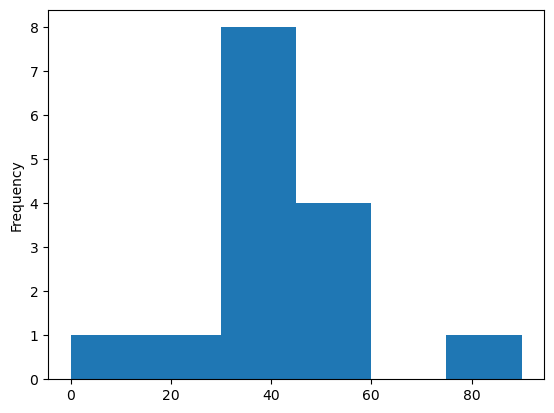

39.623886666666664

In [243]:
titanic_test[titanic_test["room"]=='A'].describe()
titanic_test[titanic_test["room"]=='A']["Fare"].plot.hist(bins=range(0, 91, 15))
plt.show()

titanic_test[titanic_test["room"]=='A']["Fare"].mean()

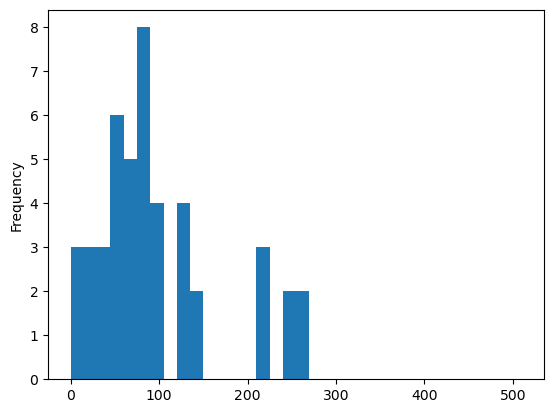

113.50576382978724

In [244]:
titanic_test[titanic_test["room"]=='B'].describe()
titanic_test[titanic_test["room"]=='B']["Fare"].plot.hist(bins=range(0, 511, 15))
plt.show()

titanic_test[titanic_test["room"]=='B']["Fare"].mean()

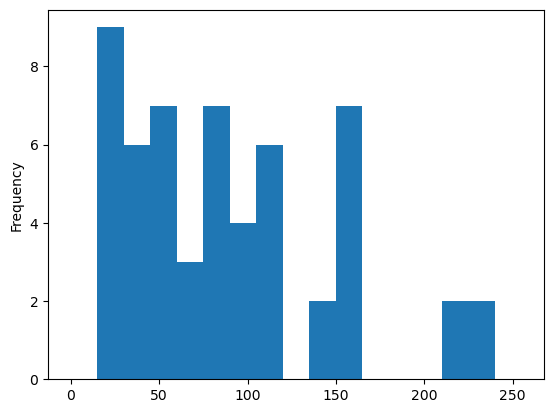

100.15134067796612

In [245]:
titanic_test[titanic_test["room"]=='G'].describe()
titanic_test[titanic_test["room"]=='C']["Fare"].plot.hist(bins=range(0, 270, 15))
plt.show()

titanic_test[titanic_test["room"]=='C']["Fare"].mean()

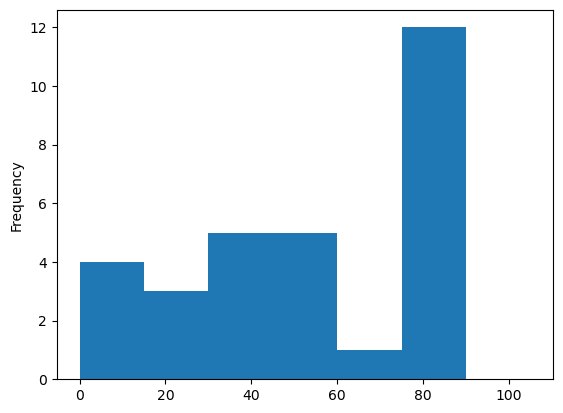

57.24457575757576

In [246]:
titanic_test[titanic_test["room"]=='D']["Fare"].plot.hist(bins=range(0, 120, 15))
plt.show()

titanic_test[titanic_test["room"]=='D']["Fare"].mean()

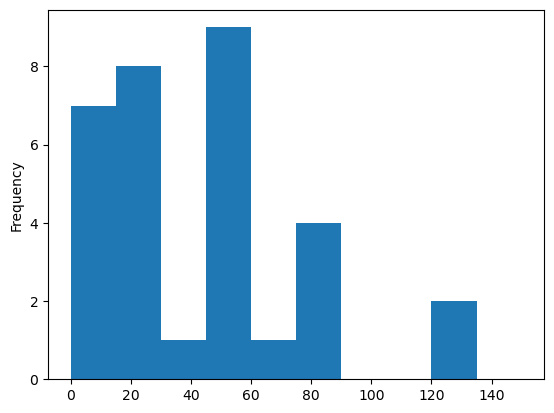

46.026693749999986

In [247]:
titanic_test[titanic_test["room"]=='E']["Fare"].plot.hist(bins=range(0, 151, 15))
plt.show()

titanic_test[titanic_test["room"]=='E']["Fare"].mean()

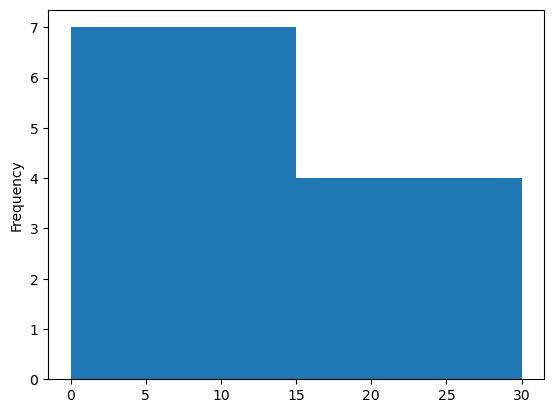

18.69679230769231

In [248]:
titanic_test[titanic_test["room"]=='F']["Fare"].plot.hist(bins=range(0, 45, 15))
plt.show()

titanic_test[titanic_test["room"]=='F']["Fare"].mean()

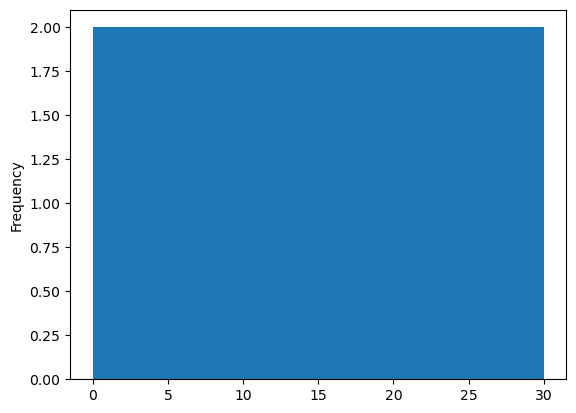

13.58125

In [249]:
titanic_test[titanic_test["room"]=='G']["Fare"].plot.hist(bins=range(0, 31, 15))
plt.show()

titanic_test[titanic_test["room"]=='G']["Fare"].mean()

In [250]:
titanic["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## 데이터 분석

- 성별에 따른
- 동행자가 있는 경우
- 부모-자식 관계
- 나이에 따른
- 티켓 등급에 따라
- 가족 구성원에서 누가 가장 많이 살아남았을까 이 이ㅣ수슈ㅠㅠㅠ

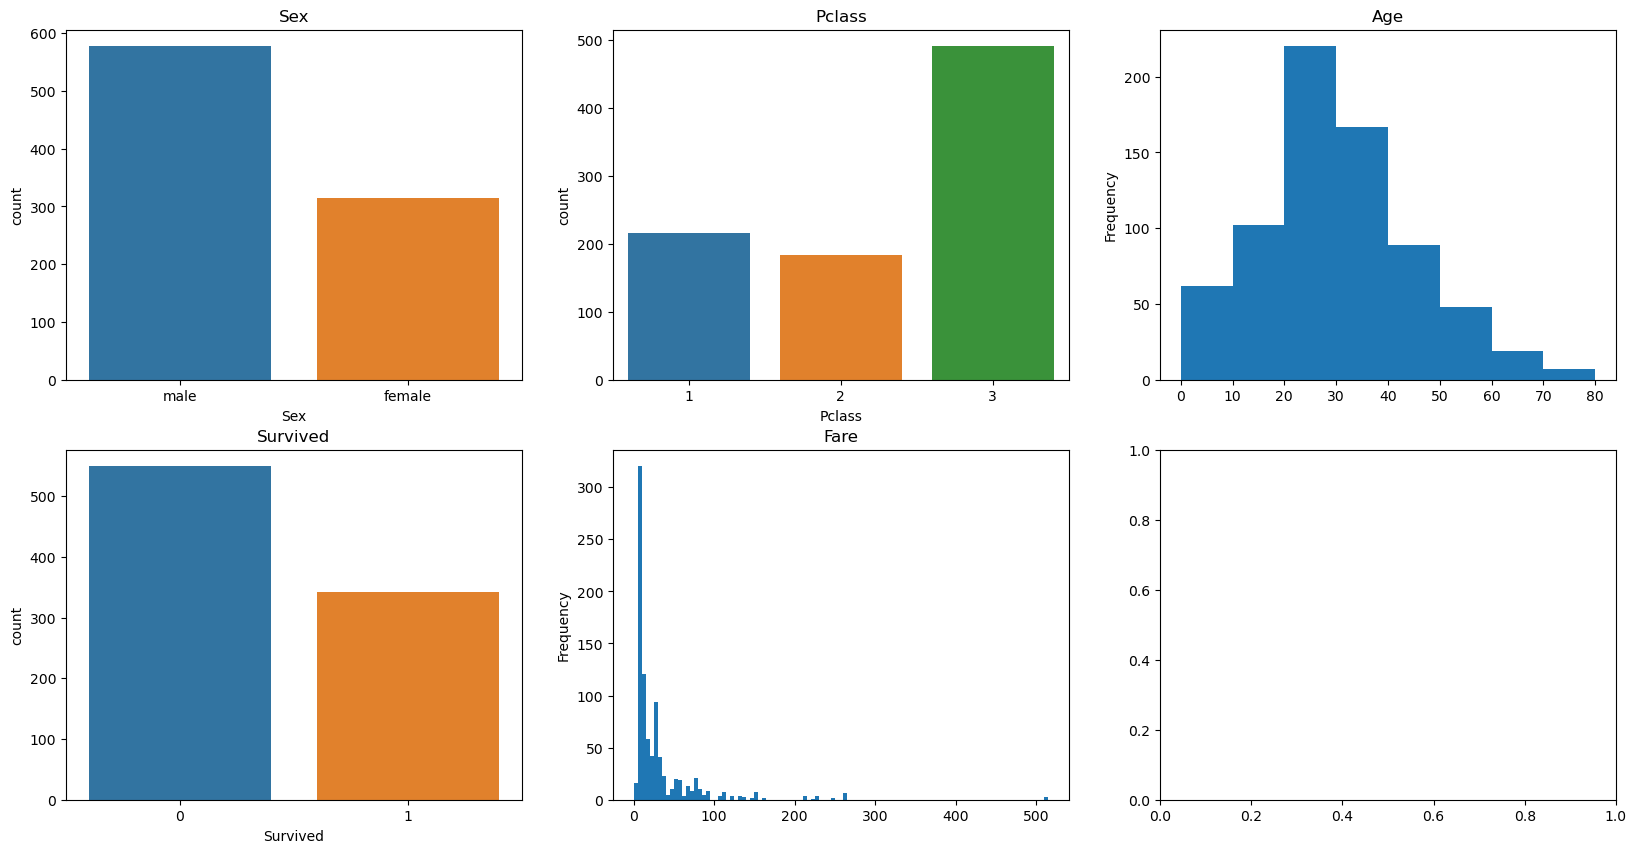

In [251]:
%matplotlib inline

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

sns.countplot(x=titanic['Sex'], ax=ax[0, 0])
ax[0, 0].set_title("Sex")

sns.countplot(x=titanic["Pclass"], ax=ax[0, 1])
ax[0, 1].set_title("Pclass")

titanic["Age"].plot.hist(bins=range(0, 81, 10), ax=ax[0, 2])
ax[0, 2].set_title("Age")

sns.countplot(x=titanic["Survived"], ax=ax[1, 0])
ax[1, 0].set_title("Survived")

titanic["Fare"].plot.hist(bins=range(0, 520, 5), ax=ax[1, 1])
ax[1, 1].set_title("Fare")

plt.show()

#### 성별

In [ ]:
sns.countplot(x=titanic["Sex"], hue=titanic["Survived"])
plt.show()

titanic[titanic["Sex"]=="male"]['Survived'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'])
plt.show()
titanic[titanic["Sex"]=="female"]['Survived'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'])
plt.show()

p.add(so.Bars(), so.Hist(), so.Stack(), color="cut")

#### Pclass

In [ ]:
sns.countplot(x=titanic["Pclass"], hue=titanic["Survived"])
plt.show()

##### Age

In [210]:
titanic['Initial']=0
for i in titanic:
    titanic['Initial']=titanic.Name.str.extract('([A-Za-z]+)\.')

titanic['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

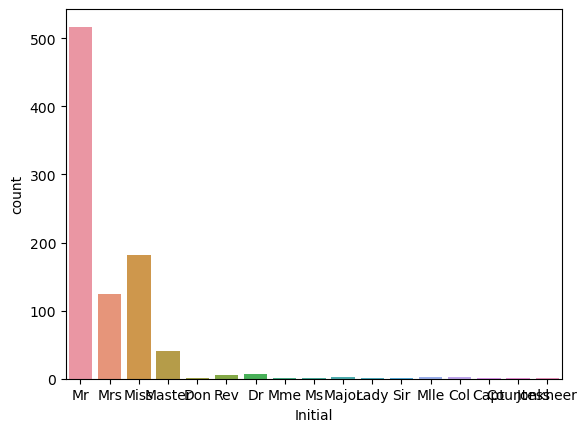

,,Initial
Initial,Initial,
Capt,Capt,1
Col,Col,2
Countess,Countess,1
Don,Don,1
Dr,Dr,7
Jonkheer,Jonkheer,1
Lady,Lady,1
Major,Major,2
Master,Master,40


In [211]:
sns.countplot(x=titanic['Initial'])
plt.show()

titanic.groupby('Initial')['Initial'].value_counts().to_frame()

In [212]:
pd.crosstab([titanic.Initial, titanic.Sex], titanic.Age).T.style.background_gradient(cmap='summer_r')

In [213]:
titanic['Initial'].replace(['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Mr', 'Rev', 'Sir'], 'Mr', inplace=True)
titanic['Initial'].replace(['Countess', 'Lady', 'Mrs'], 'Mrs', inplace=True)
titanic['Initial'].replace(['Master'], 'Master', inplace=True)
titanic['Initial'].replace(['Miss', 'Mlle', 'Mme', 'Ms'], 'Miss', inplace=True)
titanic['Initial'].replace(['Dr'], 'Other', inplace=True)

In [214]:
titanic.groupby('Initial')['Age'].mean()

Initial
Master     4.616750
Miss      21.887097
Mr        32.916196
Mrs       35.984252
Other     42.000000
Name: Age, dtype: float64

In [215]:
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mr'),'Age']=33
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mrs'),'Age']=36
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Master'),'Age']=5
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Miss'),'Age']=22
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Other'),'Age']=42

In [216]:
titanic.Age.isnull().sum()

0

<AxesSubplot:xlabel='Survived', ylabel='Age'>

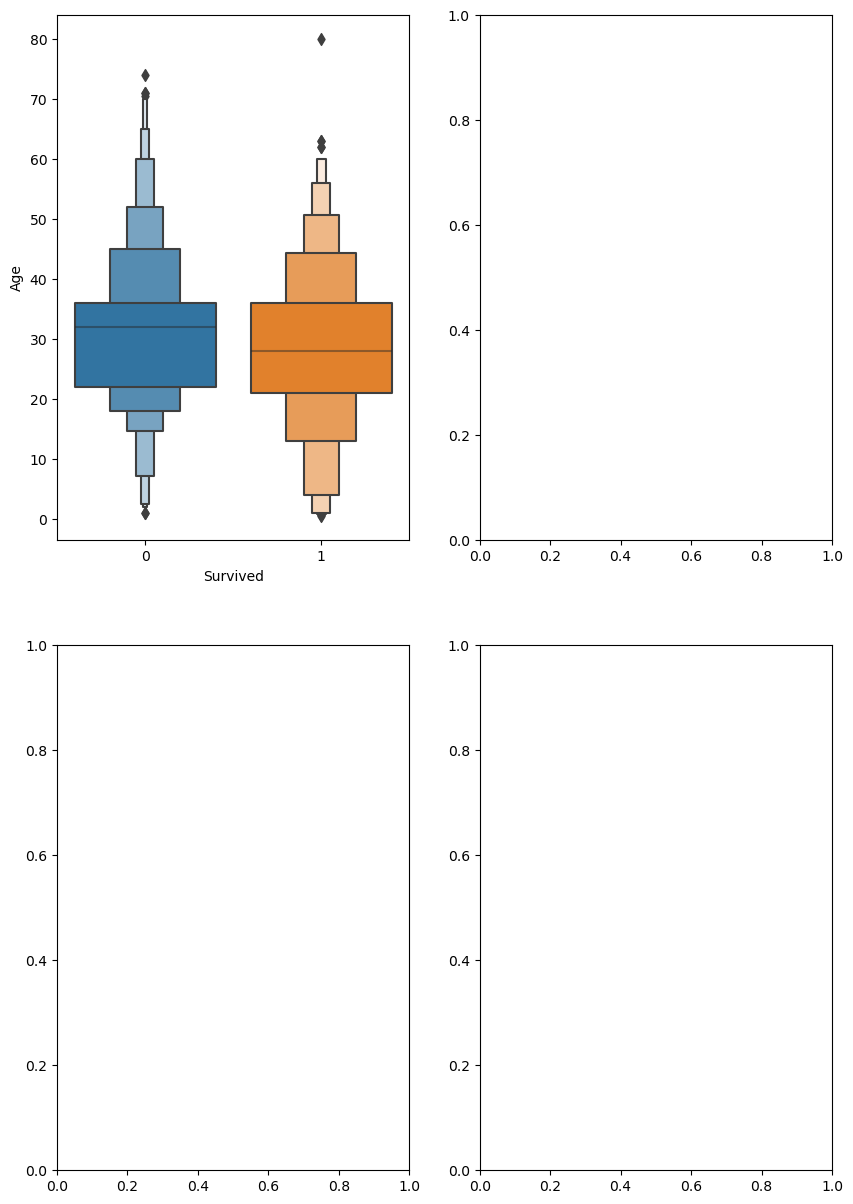

In [217]:
fig, ax = plt.subplots(2, 2, figsize=(10, 15))

sns.boxenplot(y=titanic["Age"], x=titanic["Survived"], ax=ax[0, 0])


<AxesSubplot:xlabel='age_group'>

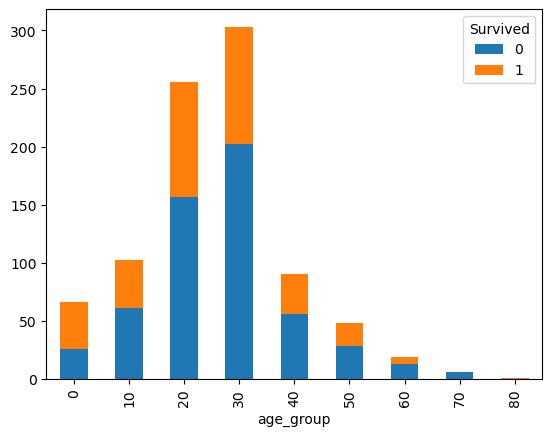

In [218]:
bins = range(0, 91, 10)
bins_label = [i for i in bins]
titanic["age_group"] = pd.cut(titanic["Age"], bins, right=False, labels=bins_label[:-1])
a = titanic.groupby("age_group")["Survived"].value_counts()
a.unstack().plot.bar(stacked=True)

In [208]:
sns.factorplot('age_group', hue='Survived',data=titanic)
plt.show()

C:\Users\82108\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\82108\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

#### family

In [219]:
titanic['familyname']=0
for i in titanic:
    titanic['familyname']=titanic.Name.str.extract('(\. [A-Za-z]+)')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,room,Initial,age_group,familyname
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr,20,. Owen
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,30,. John
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss,20,. Laina
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,30,. Jacques
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr,30,. William
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,Mr,20,. Juozas
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Miss,10,. Margaret
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,NaN,Miss,20,. Catherine


cabin

In [221]:
titanic['familyname'] = 0
for i in titanic:
    titanic['familyname'] = titanic.Name.str.extract('\. ([A-Za-z]+)')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,room,Initial,age_group,familyname
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr,20,Owen
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,30,John
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss,20,Laina
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,30,Jacques
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr,30,William
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,Mr,20,Juozas
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Miss,10,Margaret
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,NaN,Miss,20,Catherine


In [222]:
pd.crosstab(titanic.familyname,titanic.Parch).T.style.background_gradient(cmap='summer_r')

In [223]:
pd.crosstab(titanic.familyname,titanic.SibSp).T.style.background_gradient(cmap='summer_r')

In [231]:
titanic['family_member'] = 0

titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Mr'),'family_member'] = 'parent'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Mrs'),'family_member'] = 'parent'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Other'),'family_member'] = 'parent'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Master'),'family_member'] = 'child'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Miss'),'family_member'] = 'child'
titanic.loc[(titanic.SibSp==0),'family_member'] = 'alone'
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,room,Initial,age_group,familyname,family_member
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr,20,Owen,parent
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,30,John,parent
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss,20,Laina,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,30,Jacques,parent
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr,30,William,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,Mr,20,Juozas,alone
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Miss,10,Margaret,alone
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,NaN,Miss,20,Catherine,child


In [232]:
titanic['family_member'].value_counts()

alone     608
parent    190
child      93
Name: family_member, dtype: int64

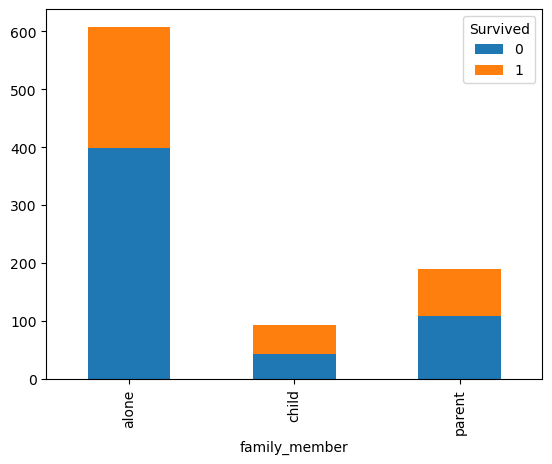

In [233]:
a = titanic.groupby("family_member")["Survived"].value_counts()
a.unstack().plot.bar(stacked=True)

plt.show()

In [225]:
family_count = titanic.Parch+titanic.SibSp

pd.crosstab(titanic.familyname,family_count).T.style.background_gradient(cmap='summer_r')

<AxesSubplot:xlabel='family_size', ylabel='count'>

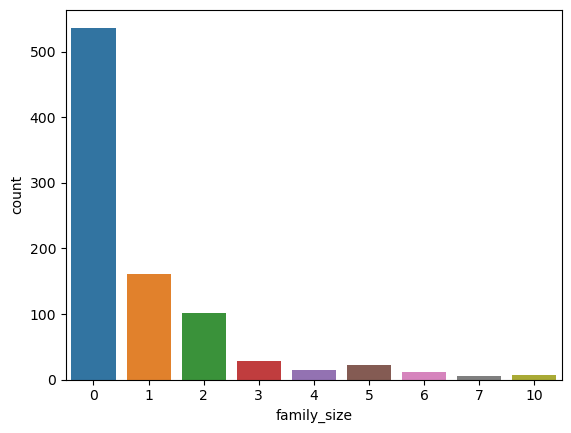

In [254]:
titanic["family_size"] = 0

titanic["family_size"] = family_count
sns.countplot(x=titanic["family_size"])

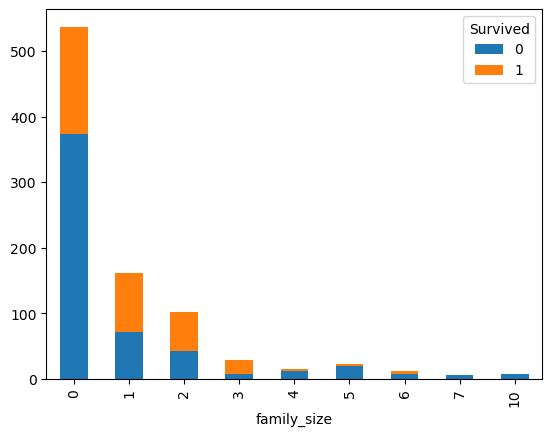

In [255]:
a = titanic.groupby("family_size")["Survived"].value_counts()
a.unstack().plot.bar(stacked=True)

plt.show()

In [256]:
pd.crosstab(titanic.family_size,titanic.Survived).T.style.background_gradient(cmap='summer_r')

family_size,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0
